## Checking the Inter-Rater data has been preprocessed correctly

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from twaidata.MRI_preprep.io import load_nii_img
from twaidata.mri_dataset_directory_parsers.MSS3_multirater import MSS3MultiRaterDataParser
from twaidata.mri_dataset_directory_parsers.LBC_multirater import LBCMultiRaterDataParser
from tqdm import tqdm

In [2]:
parser = MSS3MultiRaterDataParser(
        # paths on the cluster for the in house data
        "/home/s2208943/ipdis/data/InterRater_data",
        "/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData"
    )
    
iomap = parser.get_dataset_inout_map()
for key, value in iomap.items():
    print("individual: ", key)
    print("individual map:", value)
    print(value.keys())
    break

individual:  MSS3_ED_025
individual map: {'FLAIR': {'infile': '/home/s2208943/ipdis/data/InterRater_data/MSS3_ED_025/V1/MSS3_ED_025_V1_FLAIRbrain.nii.gz', 'outpath': '/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/imgs', 'outfilename': 'MSS3_ED_025_FLAIR', 'islabel': False}, 'wmhes': {'infile': '/home/s2208943/ipdis/data/InterRater_data/MSS3_ED_025/V1/MSS3_ED_025_V1_WMH_mask_ES.nii.gz', 'outpath': '/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/labels', 'outfilename': 'MSS3_ED_025_wmhes', 'islabel': True}, 'T1': {'infile': '/home/s2208943/ipdis/data/InterRater_data/MSS3_ED_025/V1/MSS3_ED_025_V1_T1Wbrain_seg.nii.gz', 'outpath': '/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/imgs', 'outfilename': 'MSS3_ED_025_T1', 'islabel': False}, 'lacune': {'infile': '/home/s2208943/ipdis/data/InterRater_data/MSS3_ED_025/V1/MSS3_ED_025_V1_lacunes.nii.gz', 'outpath': '/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/labels', 'outfilenam

In [38]:
def visualise_rater_files(name, filemap, colorbar=False):
    print("-------")
    print(name)
    num_imgs = len(filemap.keys())
    imgs = {key: load_nii_img(os.path.join(filemap[key]['outpath'], filemap[key]['outfilename'] + ".nii.gz"))[0] for key in tqdm(filemap.keys())}
    
    fig, axs = plt.subplots(3, num_imgs, figsize=(20, 10))
    
    num_slices = imgs['FLAIR'].shape[-1]
    islices = [num_slices // 4, num_slices // 2, (num_slices // 4) * 3]
    for i in range(3):
        for j, key in enumerate(imgs.keys()):
            ax = axs[i][j]
            im = ax.imshow(imgs[key][:,:,islices[i]])
            if i == 0:
                ax.set_title(key)
            if colorbar:
                plt.colorbar(im, ax=ax)
                
    plt.show()
    plt.clf()

-------
MSS3_ED_025


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 15.60it/s]


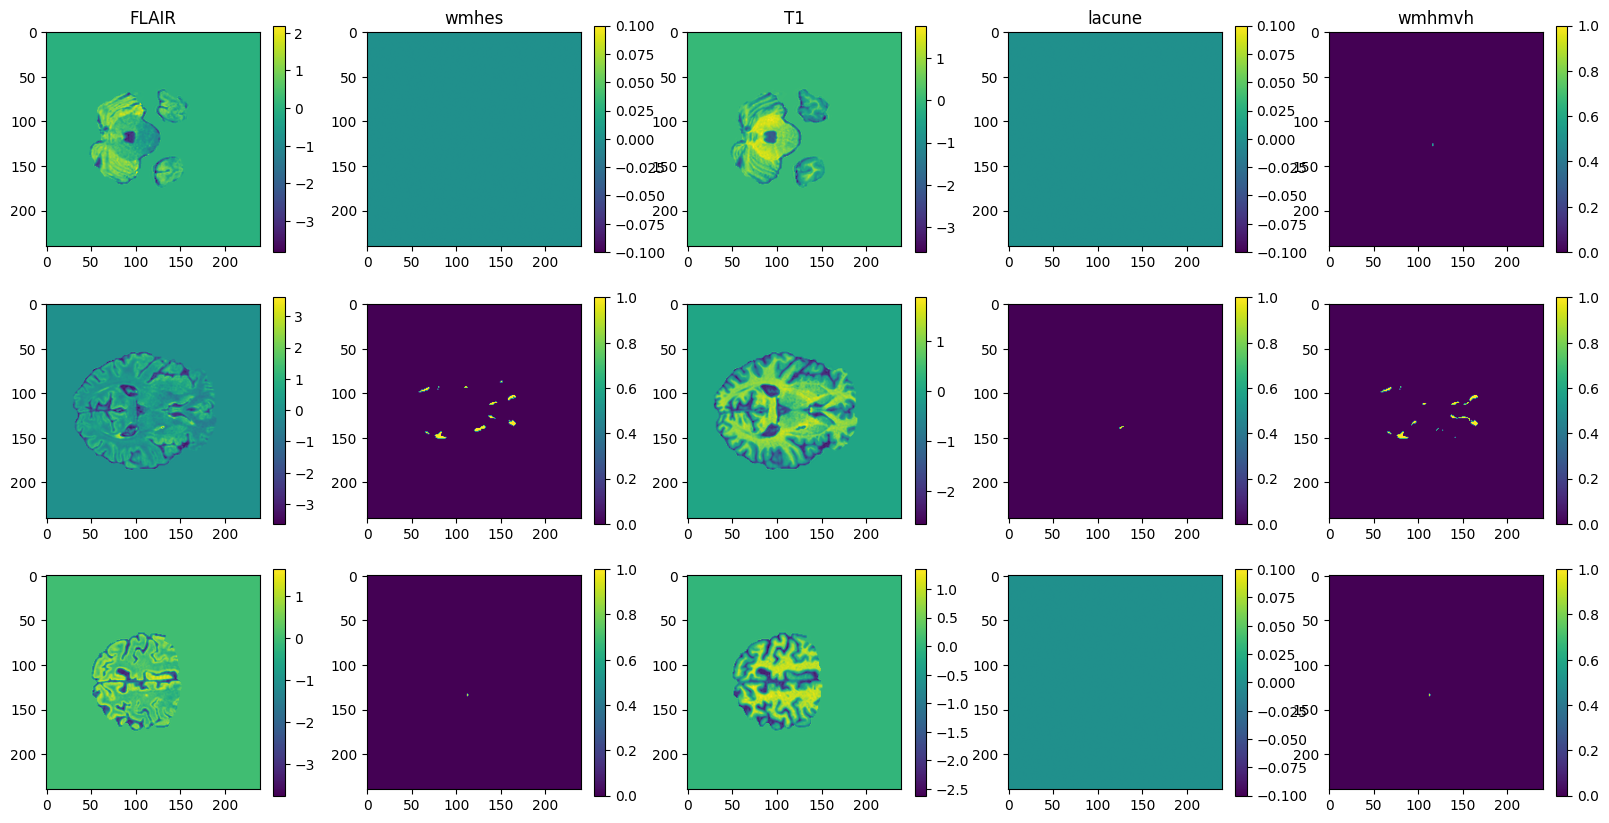

In [ ]:
for ind, filemap in iomap.items():
    visualise_rater_files(ind, filemap, colorbar=True)
    input()
    break

### problems that I have found:
bet does not work properly at all, see MSS3_ED_041. if this continues I will need to switch to pyrobex

remembre tha tthe WMH challenge test dataset has multiple raters!!! If I want to make a paper out of it you know...

In [21]:
imgs.keys()

dict_keys(['FLAIR', 'wmhes', 'T1', 'lacune', 'wmhmvh'])